# Image Features

## 1 Introduction
This notebook is used to preprocess the social post information, and perform exploratory data analysis & feature engineering on it.

## 2 Project Pipeline
- Data Preprocessing
- Exploratory Data Analysis
- Feature Engineering

## 3 Data Preprocessing

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
import time
import cv2

In [ ]:
# Loading the image paths
df = pd.read_json('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/social_data_sample_20%.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54650 entries, 0 to 54649
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Uid                   54650 non-null  object 
 1   photo_count           54650 non-null  int64  
 2   ispro                 54650 non-null  int64  
 3   canbuypro             54650 non-null  int64  
 4   timezone_timezone_id  54650 non-null  int64  
 5   timezone_offset       54650 non-null  int64  
 6   Geoaccuracy           54650 non-null  int64  
 7   Category              54650 non-null  object 
 8   Concept               54650 non-null  object 
 9   Subcategory           54650 non-null  object 
 10  img_path              54650 non-null  object 
 11  label                 54650 non-null  float64
 12  TitleLen              54650 non-null  int64  
 13  TagNum                54650 non-null  int64  
 14  DaysSinceFirstPhoto   54650 non-null  int64  
 15  DayOfWeek          

In [ ]:
img_list = np.array(df['img_path'])
img_list

array(['train/3175@N73/16586.jpg', 'train/3175@N73/16587.jpg',
       'train/3175@N73/16588.jpg', ..., 'train/16832@N83/1118160.jpg',
       'train/91286@N45/1118177.jpg', 'train/46959@N39/1118188.jpg'],
      dtype=object)

In [ ]:
df['img_path']

0           train/3175@N73/16586.jpg
1           train/3175@N73/16587.jpg
2           train/3175@N73/16588.jpg
3           train/3175@N73/16589.jpg
4           train/3175@N73/16590.jpg
                    ...             
54645    train/74083@N15/1117947.jpg
54646    train/43170@N58/1118135.jpg
54647    train/16832@N83/1118160.jpg
54648    train/91286@N45/1118177.jpg
54649    train/46959@N39/1118188.jpg
Name: img_path, Length: 54650, dtype: object

In [ ]:
# Defining a function to extract simple features from an image
def extract_features(path):
    try:
        img = Image.open(path)
        img_width,img_height = img.size
        img_mode = img.mode
        img.close()
        return ('Yes',img_width,img_height,img_mode)
    except:
        return ('No',np.NaN,np.NaN,None)

In [ ]:
# Measuring the time required to process a single image
t = time.time()
print('Sample features:',extract_features('train/109@N11/169454.jpg'))
print('Processing time',time.time() - t)

Sample features: ('No', nan, nan, None)
Processing time 0.0002651214599609375


In [ ]:
# Measuring the time required to process a single error
t = time.time()
print('Sample features:',extract_features('train/109@N11/169455.jpg'))
print('Processing time:',time.time() - t)

Sample features: ('No', nan, nan, None)
Processing time: 0.0002124309539794922


Based on the time required to process a single image, the selected sample should take less than 10 min.

In [ ]:
!unzip -o '/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/train.zip'

In [ ]:
# Extracting simple features from the images
img_exists,img_width,img_height,img_mode = np.array([]),np.array([]),np.array([]),np.array([])
for path in img_list:
    img_features = extract_features(path)
    img_exists,img_width,img_height,img_mode = np.append(img_exists,img_features[0]),np.append(img_width,img_features[1]),np.append(img_height,img_features[2]),np.append(img_mode, img_features[3])
img_pixels = img_width*img_height

In [ ]:
# Creating a DataFrame containing the image features
img_df = pd.DataFrame({'Image Exists':img_exists,
                       'Image Width':img_width,
                       'Image Height':img_height,
                       'Image Mode':img_mode,
                       'Image Pixels':img_pixels})
img_df

,Image Exists,Image Width,Image Height,Image Mode,Image Pixels
0,Yes,396.0,474.0,RGB,187704.0
1,Yes,455.0,500.0,RGB,227500.0
2,Yes,500.0,371.0,RGB,185500.0
3,Yes,400.0,391.0,RGB,156400.0
4,Yes,394.0,500.0,RGB,197000.0
...,...,...,...,...,...
54645,Yes,500.0,333.0,RGB,166500.0
54646,Yes,500.0,333.0,RGB,166500.0
54647,Yes,500.0,336.0,RGB,168000.0
54648,Yes,500.0,367.0,RGB,183500.0


In [ ]:
img_df.shape

(54650, 5)

In [ ]:
# img_df.to_json('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/img_data_sample_20%.json')

In [ ]:
img_df = pd.read_json('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/img_data_sample_20%.json')
img_df

,Image Exists,Image Width,Image Height,Image Mode,Image Pixels
0,Yes,396,474,RGB,187704
1,Yes,455,500,RGB,227500
2,Yes,500,371,RGB,185500
3,Yes,400,391,RGB,156400
4,Yes,394,500,RGB,197000
...,...,...,...,...,...
54645,Yes,500,333,RGB,166500
54646,Yes,500,333,RGB,166500
54647,Yes,500,336,RGB,168000
54648,Yes,500,367,RGB,183500


In [ ]:
(img_df['Image Exists']=='No').sum()

0

## 4 Exploratory Data Analysis

In [ ]:
# Calculating descriptive statistics of 'Image Width', 'Image Height' and 'Image Pixels'
img_df[['Image Width','Image Height','Image Pixels']].describe()

,Image Width,Image Height,Image Pixels
count,110749.000000,110749.000000,110749.000000
mean,460.654633,389.331272,175341.917471
std,69.441159,82.153730,28522.402272
min,39.000000,21.000000,5838.000000
25%,438.000000,333.000000,166500.000000
50%,500.000000,340.000000,166500.000000
75%,500.000000,500.000000,187500.000000
max,570.000000,1024.000000,583680.000000


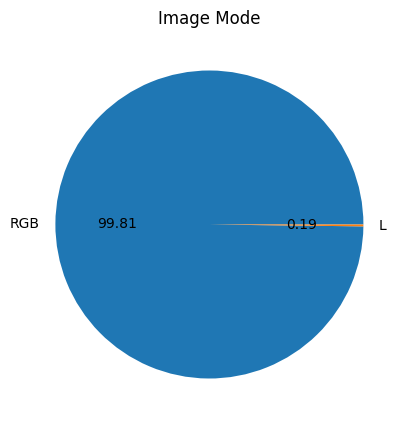

In [ ]:
# Visualising 'Image Mode'
fig,ax = plt.subplots(1,1,figsize=[5,5])
data = img_df['Image Mode'].value_counts()
labels = data.index
ax.set_title('Image Mode')
ax.pie(data,labels=labels,autopct='%.2f')
fig.show()

In [ ]:
img_df['Image Mode'].value_counts()

RGB    110534
L         215
Name: Image Mode, dtype: int64

Thus, there are 110534 'RGB' images and 215 'Grayscale' images.

In [ ]:
# Visualising histograms of 3 images
def plot_img_hist(path):
    img = Image.open(path)
    r,g,b = img.split()
    plt.imshow(img)
    fig,ax = plt.subplots(1,3,figsize=[15,5])
    for i,ch in enumerate([r,g,b]):
        sns.lineplot(x=np.arange(256),y=ch.histogram(),ax=ax[i],)
        if i == 0:
            ax[i].set_xlabel('Red')
        if i == 1:
            ax[i].set_xlabel('Green')
        if i == 2:
            ax[i].set_xlabel('Blue')
        ax[i].set_ylabel('Pixel Count')
    fig.show()
    img.close()

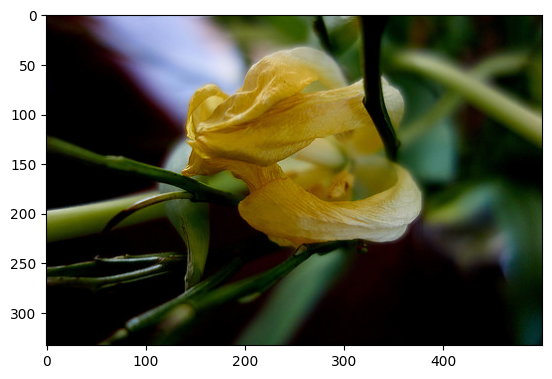

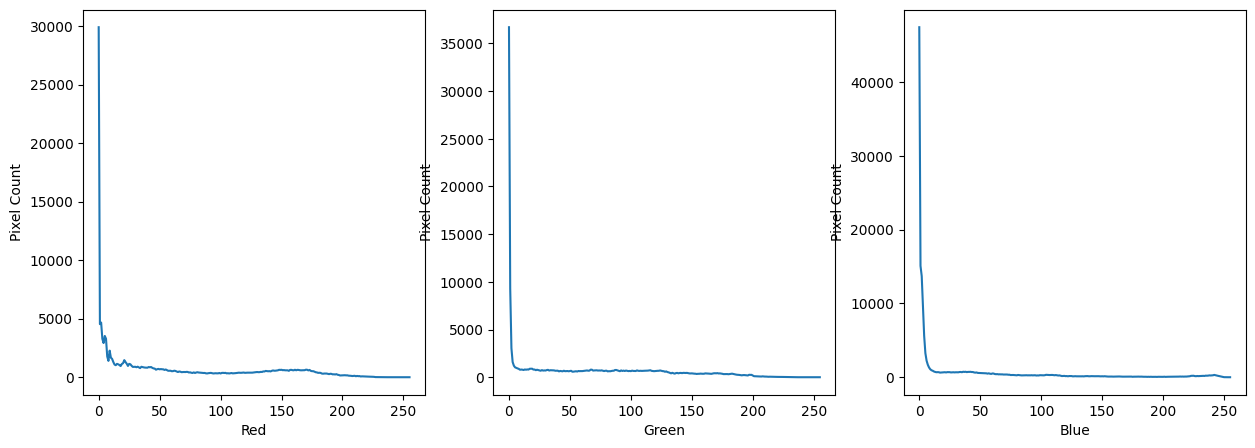

In [ ]:
plot_img_hist('/content/train/100013@N27/951130.jpg')

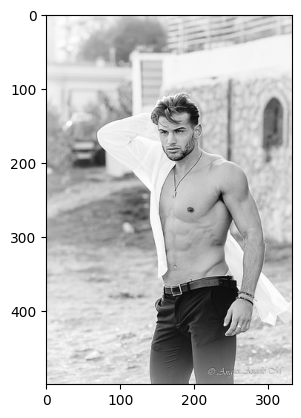

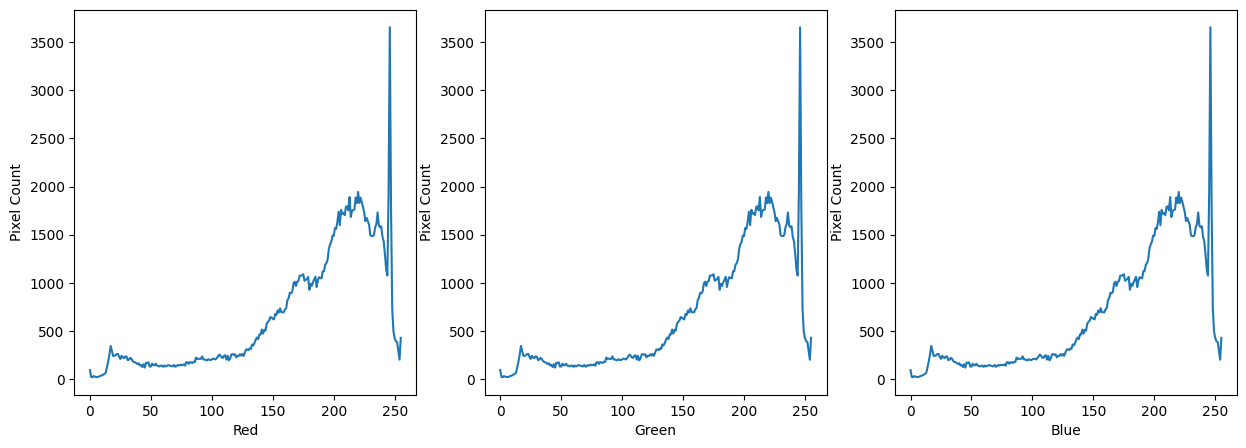

In [ ]:
plot_img_hist('/content/train/100016@N58/951148.jpg')

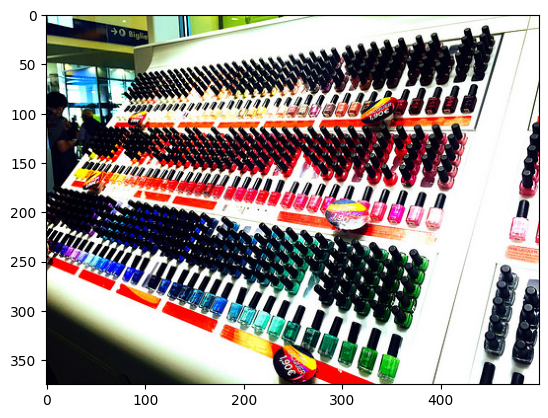

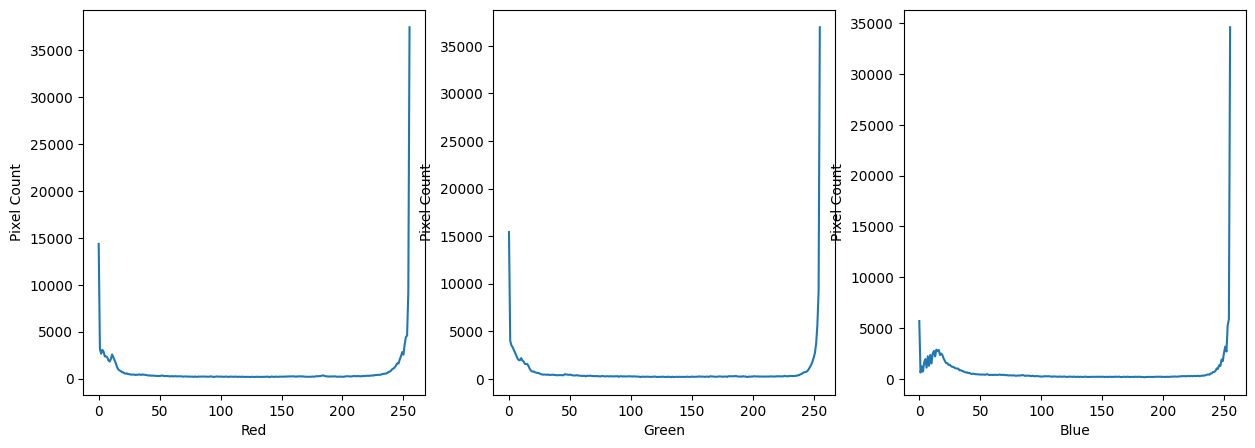

In [ ]:
plot_img_hist('/content/train/100022@N60/951175.jpg')

As per the histograms, the images seem to have diverse colour profiles.

## 5 Feature Engineering

### 5.1 Extracting VGG-19 features

#### 5.1.1 Building the model

In [ ]:
def vgg19(input_shape=(None,None,None),img_size=150):
    #Input layer
    X_input = tf.keras.Input(input_shape)

    # Preprocessing layers
    X = tf.keras.layers.Resizing(img_size,img_size)(X_input)
    X = tf.keras.layers.Rescaling(1./255)(X)

    # VGG19 layer
    base_model = tf.keras.applications.vgg19.VGG19(include_top=False,pooling='avg')
    base_model.trainable = False
    X = base_model(X,training=False)

    return tf.keras.Model(X_input,X)

In [ ]:
model = vgg19()

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# Visualising the model architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, Non   0         
                             e)]                                 
                                                                 
 resizing (Resizing)         (None, 150, 150, None)    0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, None)    0         
                                                                 
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
Total params: 20024384 (76.39 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


#### 5.1.2 Creating a data pipeline

In [ ]:
def load_img(img_list):
    i=0
    while True:
      img = cv2.imread(img_list[i])
      if img.ndim==2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
      img = np.expand_dims(img,axis=0)
      yield img
      i+=1

#### 5.1.3 Making predictions

In [ ]:
gen = load_img(img_list)

In [ ]:
sample_size = img_df.shape[0]
predictions = model.predict(gen,steps=sample_size)

110749/110749 [==============================] - 936s 8ms/step


In [ ]:
predictions.shape

(110749, 512)

In [ ]:
# np.save('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/vgg19_features.npy',predictions)

In [ ]:
# Measuring the time required for a sample of 8

import time

t = time.time()
model.predict(gen,steps=8)
time.time() - t

8/8 [==============================] - 2s 6ms/step


2.631721258163452

In [ ]:
gen.close()

### 5.2 Extracting EfficientNet-B4 features

#### 5.2.1 Building the model

In [ ]:
# def EfficientNetB4(input_shape=(None,None,None),img_size=150):
#     #Input layer
#     X_input = tf.keras.Input(input_shape)

#     # Preprocessing layers
#     X = tf.keras.layers.Resizing(img_size,img_size)(X_input)
#     X = tf.keras.layers.Rescaling(1./255)(X)

#     # VGG19 layer
#     base_model = tf.keras.applications.efficientnet.EfficientNetB4(include_top=False,pooling='avg')
#     base_model.trainable = False
#     X = base_model(X,training=False)

#     return tf.keras.Model(X_input,X)

In [ ]:
# model = EfficientNetB4()

In [ ]:
# # Visualising the model architecture
# model.summary()

#### 5.2.2 Making predictions

In [ ]:
# gen = load_img(img_list)

In [ ]:
# sample_size = img_df.shape[0]
# predictions = model.predict(gen,steps=sample_size)

In [ ]:
# np.save('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/efficientnetb4_features.npy',predictions)

In [ ]:
# gen.close()

### 5.3 Extracting MobileNetV2 features

#### 5.3.1 Building the model

In [ ]:
def MobileNetV2(input_shape=(None,None,3),img_size=150):
    #Input layer
    X_input = tf.keras.Input(input_shape)

    # Preprocessing layers
    X = tf.keras.layers.Resizing(img_size,img_size)(X_input)
    X = tf.keras.layers.Rescaling(1./255)(X)

    # VGG19 layer
    base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False,pooling='avg')
    base_model.trainable = False
    X = base_model(X,training=False)

    return tf.keras.Model(X_input,X)

In [ ]:
model = MobileNetV2()

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Visualising the model architecture
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 resizing_1 (Resizing)       (None, 150, 150, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
Total params: 2257984 (8.61 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


#### 5.3.2 Making predictions

In [ ]:
gen = load_img(img_list)

In [ ]:
sample_size = img_df.shape[0]
predictions = model.predict(gen,steps=sample_size)

54650/54650 [==============================] - 613s 11ms/step


In [ ]:
# np.save('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/mobilenet_v2_features_20%.npy',predictions)

In [ ]:
# Measuring the time required for a sample of 8

import time

t = time.time()
model.predict(gen,steps=8)
time.time() - t

8/8 [==============================] - 2s 14ms/step


3.317302703857422

In [ ]:
gen.close()